# Dataset

The dataset from this project is a subset of the [Large-scale CelebFaces Attributes (CelebA) Dataset](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html). The original dataset is composed of 202.599 images faces corresponding to 11.107 celebrities. For each of these images, the CelebA dataset includes 5 landmark locations (the two eyes, the nose, and the two edges of the mouth), along with 40 different attributes, including gender, hair color, presence of accesories (like hat, glasses or pendants), etc. 

Our custom CelebAMini dataset is a subset of the CelebA dataset including:
* 500 face images from 500 different celebrities. 250 of them are men, and the other 250 are women.
* Gender annotation: 0 for women, 1 for men.
* 5 landmark location

Here is an example code that uses the provided starter code to load the dataset in PyTorch



In [2]:
from google.colab import drive
import os

drive.mount('/content/gdrive')

#  Note that we need to change the working directory to the location where the 
# dataset code (celebamini.py) is, in order to be able to import it:

os.chdir('/content/gdrive/MyDrive/AMLCV/Project/')

Mounted at /content/gdrive


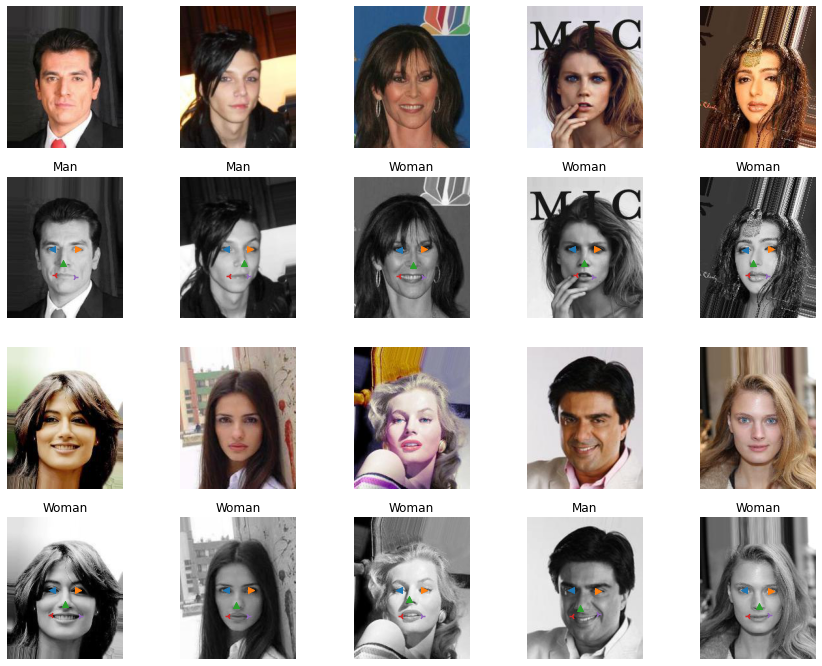

In [17]:

from celebamini import CelebAMini

import numpy as np
from numpy import random
import matplotlib.pyplot as plt

#  We define a function to visualize a face with its associated gender and 
# landmark labels
def labeled_face_visualization(face, gender, landmarks, ax = None):
    lm_marker = ['<', '>', '^', '3', '4']
    gender_txt = ['Woman', 'Man']

    if ax is None:
      ax = plt.gca()

    ax.imshow(np.asarray(face).mean(2), cmap='gray')
    ax.title.set_text(gender_txt[gender.item()])

    lm = landmarks.reshape(-1, 2)
    for i, m in enumerate(lm_marker):
      ax. scatter(lm[i,0], lm[i,1], marker=lm_marker[i])

# Dataset constructor. It supports transform and target_transform callables
dataset = CelebAMini(os.getcwd())

# We randomize an index to select some few random samples for visualization
view = random.permutation(len(dataset))

# Subplots:
rows = 2
cols = 5
size_each = 3

fig, axes = plt.subplots(rows*2, cols,figsize =(cols*size_each, rows*2*size_each) )

# Remove the plot axis
for ax in axes.reshape(-1):
  ax.axis('off')

counter = 0
for r in range(rows):
  for c in range(cols):
    face, (gender, landmarks) = dataset[view[counter]]
    counter += 1

    axes[r*2][c].imshow(face)
    labeled_face_visualization(face, gender, landmarks, axes[r*2+1][c])



In [19]:
# Dataset documentation

help(CelebAMini)

Help on class CelebAMini in module celebamini:

class CelebAMini(torchvision.datasets.vision.VisionDataset)
 |  CelebAMini(*args, **kwds)
 |  
 |  CelebA-mini is a subsample of the CelebA dataset 
 |  (<http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html>)
 |  
 |  Args: 
 |      root (string): Root directory where the celeba-mini directory is
 |      transform (callable, optional): Input image transforms
 |      target_transform (callable, optional): Transform functions for the targets
 |      
 |  Dataset:
 |      2-tuple with:
 |       - sample: The input image (PIL.Image)
 |       - target: 2-tuple with:
 |         - gender: 0 for female, 1 for male
 |         - landmarks: 10x1 Tensor with:
 |           [0]: left eye x coordinate
 |           [1]: left eye y coordinate
 |           [2]: right eye x coordinate
 |           [3]: right eye y coordinate
 |           [4]: nose x coordinate
 |           [5]: nose y coordinate
 |           [6]: left mouth x coordinate
 |           [7]: left 